In [1]:
import h5py
from pathlib import Path
import seaborn as sns
from whirligig import beamforming, data, calibration
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import optimize
home = Path.home()

def fit_func(x,a,b,c,d,e,f,g,h,i,j,k):
    
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10

def apply_cal(x, y, mag, phase):
    
    mean_mag = mag(x).mean()
    rel_mag = mean_mag / mag(x)
    
    cal = rel_mag * np.exp(-1j * phase(x))
    
    return y * cal




In [2]:
jugaad_data = home/'iCloud'/'jugaad_data'/'Characterization'/'data.h5'
jugaad_data = h5py.File(jugaad_data, 'r')

In [7]:
print(jugaad_data['frequency'][76])

25860000000.0


In [3]:
data_key = 'r10z00'

data_array = jugaad_data[data_key][:]
frequencies = jugaad_data['frequency'][:]
vnadata = data.VNAData(data_array, frequencies)

mag_cal = calibration.MagCal(Path.home()/'iCloud'/'jugaad_data'/'calibrations'/'mag_cal.npy')
phase_cal = calibration.PhaseCal(Path.home()/'iCloud'/'jugaad_data'/'calibrations'/'phase_cal.npy')

In [4]:
print(data_array.shape)

(60, 141, 2, 2)


In [5]:
x_coord = np.linspace(-0.06, 0.06, 81)
y_coord = np.linspace(-0.06, 0.06, 81)


In [6]:
beamforming.BeamformingProcessor(
    vnadata,
    x_coord,
    y_coord,
)

True

In [7]:
beamforming.BeamformingImageProcessor(vnadata)

True

In [8]:
beamforming.BeamformingMaximumProcessor(vnadata)

True

In [9]:
vnadata.data['max_data']['data'].shape

(141,)

In [10]:
vnadata.data.keys()

dict_keys(['array_data', 'summed_array_data', 'image_data', 'max_data'])

In [11]:
image_data = vnadata.data['image_data']['data']

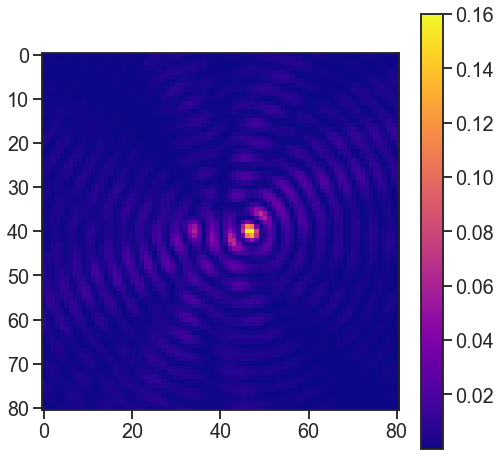

In [12]:
sns.set_theme(style='ticks', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

img = ax.imshow(
    image_data[:, :, 70]**2,
    cmap='plasma',
)
fig.colorbar(img, )

# beamforming over all data

In [13]:
rad = np.arange(35, 55, 5)
zpos = np.arange(0, 55, 5)
x_coord = np.linspace(-0.06, 0.06, 121)
y_coord = np.linspace(-0.06, 0.06, 121)
results_save_path = Path.home()/'iCloud'/'jugaad_data'/'beamforming'/'221209_beamforming_characterization'
results_save_path.mkdir(exist_ok=True, parents=True)

for i, r in enumerate(rad):
    for j, z in enumerate(zpos):
        
        if r<10:
            r_string = f'r0{r}'
        else:
            r_string = f'r{r}'
        if z<10:
            z_string = f'z0{z}'
        else:
            z_string = f'z{z}'
        
        data_key = r_string + z_string
        data_array = jugaad_data[data_key][:]
        frequencies = jugaad_data['frequency'][:]
        vnadata = data.VNAData(data_array, frequencies)
        beamforming.BeamformingProcessor(
            vnadata,
            x_coord,
            y_coord,
        )
        beamforming.BeamformingImageProcessor(vnadata)
        beamforming.BeamformingMaximumProcessor(vnadata)
        
        vnadata.save(results_save_path/(data_key+'.h5'))
        print(f'Progress: {round(100 * ((rad.size * i + j + 1) / (rad.size*zpos.size)),1)}%')


Progress: 2.3%
Progress: 4.5%
Progress: 6.8%
Progress: 9.1%
Progress: 11.4%
Progress: 13.6%
Progress: 15.9%
Progress: 18.2%
Progress: 20.5%
Progress: 22.7%
Progress: 25.0%
Progress: 11.4%
Progress: 13.6%
Progress: 15.9%
Progress: 18.2%
Progress: 20.5%
Progress: 22.7%
Progress: 25.0%
Progress: 27.3%
Progress: 29.5%
Progress: 31.8%
Progress: 34.1%
Progress: 20.5%
Progress: 22.7%
Progress: 25.0%
Progress: 27.3%
Progress: 29.5%
Progress: 31.8%
Progress: 34.1%
Progress: 36.4%
Progress: 38.6%
Progress: 40.9%
Progress: 43.2%
Progress: 29.5%
Progress: 31.8%
Progress: 34.1%
Progress: 36.4%
Progress: 38.6%
Progress: 40.9%
Progress: 43.2%
Progress: 45.5%
Progress: 47.7%
Progress: 50.0%
Progress: 52.3%
